# Calculate Volatility (Using Eikon Dataset)


[Market Filter Dev Slide](https://docs.google.com/presentation/d/1OOsW0BRcUBuA6kPg_gjk7CH36ArFlg7-ZY-3GGm6Sh0/edit#slide=id.g543289dded_0_2)

Also see 2.0 Feature Engineering/Volatility.ipynb  

Volatility calcualtion follow this definition: https://www.investopedia.com/terms/v/volatility.asp



Start with Price table from Eikon dataset.  
Use lookup-symbol.csv to map column header to ticker symbol.  
Develop custom window function for volatility calculation.  
Computing volatility during analysis period.  
Extract cross-section data during target date.  
Report grouping of stock by volatility.  

In [1]:
import os, sys
import xlrd
import pandas as pd
import numpy as np
from datetime import datetime
import talib
from talib.abstract import *
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("/home/jovyan/eikon-data")
# os.listdir() # Check data directory

lookup = pd.read_csv('lookup-stock.csv') # For lookup (ISIN, RIC, name, symbol)
# lookup


fname = 'SET_Price_2014-2020.xlsm'
wb = xlrd.open_workbook(fname)
wb.sheet_names()

['REQUEST_TABLE',
 'Price2020',
 'Price2019',
 'Price2018',
 'Price2017',
 'Price2016',
 'Price2015',
 'Price2014']

# Time Series for Each Stock

Process daily turnover data of each stock.

Stack worksheet together.

In [2]:
series = {}

for i in range(2,8): # Note the sheet index 2014-2019 1-7
    s = wb.sheets()[i]

    # Date index
    s1 = pd.Series(s.col(0)[4:]) # observation starts at row 4
    s1 = s1.apply(lambda x: datetime(*xlrd.xldate_as_tuple(x.value, wb.datemode)))
    
    for j in range(1, s.ncols):
        c = s.col(j)
        print("{}".format(c[3].value))
        name = c[3].value # Company name (Eikon name)
        # Convert to Ticker symbol
        try:
            name = lookup.loc[lookup['name']==name].symbol.values[0]
        except Exception as e:
            print("Lookup ticker for %s faile: %s" % (name, str(e)))
        # df = pd.DataFrame()
        if not "#ERROR" in name:
            # Convert spreadsheet market cap value to python
            s2 = pd.Series(c[4:]) # observation starts at row 4
            s2 = s2.apply(lambda x: x.value)
            df = pd.concat([s1, s2], axis=1)

            if not name in series:
                series[name] = []
            series[name].append(df)


SEVEN UTILITIES AND POWER ORS
AREEYA PROPERTY
ASIA AVIATION
AMATA B GRIMM PWPL.IFCF.
ADVANCED CONNECTION CORPORATION
ABSOLUTE CLEAN ENERGY
AUTOCORP HOLDING
ADVANCED INFO SER.
AEC SECURITIES
AE.THANA SINSAP (THAI.)
ASIA FIBER
AAPICO HITECH
AIKCHOL HOSPITAL
ASIAN INSULATORS
AIM COML.GW.FH.&. LH. REIT UNT.
AIM INDL.GW.FH.&. LH. REIT
ADVANCED INFO.TECH.
AJ PLAST
AJ ADVANCE TECHNOLOGY ORS
EKARAT ENGINEERING
ALLA
ALT TELECOM
ALUCON
AMANAH LEASING
AMARIN PRINTING & PBL.
AMATA
AMATA NVDR
AMATA VN
ASIA METAL
ANANDA DEVELOPMENT
AIRPORTS OF THAILAND
AP (THAILAND)
ASIAN PHYTOCEUTICALS
ASIA PRECISION
APEX DEVELOPMENT
AGRIPURE HOLDINGS
AQ ESTATE
AQUA
ASIASOFT
SYNERGETIC AUTO PERFORMANCE
ASEFA
ASIA HOTEL
ASIAN SEA CORPORATION
ASIAN MARINE SERVICES
ASIA SERMKIJ LEASING
ASIA PLUS GROUP HDG.
ASSET WORLD
ALLIANZ AYUDHYA CAPITAL
BUALUANG OFFE.LH. REIT.
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
BANGKOK COMMERCIAL ASSET MANAGEMENT
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA


SVI
SVOA
SYMPHONY COMMUNICATION
SYNNEX (THAILAND)
SYNTEC CONSTRUCTION
THAI AGRO ENERGY
TIPCO ASPHALT
TBSP
TROPICAL CANNING
THANACHART CAPITAL
THAI CAPITAL
THAI CENTRAL CHM.
TCJ ASIA
TCM CORPORATION ORS
THAI COATING INDL.
TEAM PRECISION
TEAM CNSL.ENGR.&. MAN.
THAILAND FUTURE
THAIFOODS GROUP
THAI FILM INDUSTRIES
THAI PRESIDENT FOODS
THAI-GERMAN PRODUCTS
TONG HUA HOLDING
THAI AIRWAYS INTL.
RATCHTHANI LEASING
THAICOM
STEEL
THONBURI HEALTHCARE GROUP
THANTAWAN INDUSTRY
THAI REINSURANCE
THAIRE LIFE ASSURANCE
THAI INDUSTRIAL 1
DHIPAYA INSURANCE
TIPCO FOODS
TISCO FINANCIAL GROUP
THAILAND IRON WORKS
THITIKORN
TAOKAENOI FOOD & MKTG.
TKS TECHNOLOGIES
T KRUNGTHAI INDUSTRIES
TESCO LOTUS RET.GW. FH. &.LH.
THAILAND HOSPITALITY PROPERTY
TMB BANK
THAI METAL DRUM
TMT STEEL
TRINITY WATTHANA
THANULUX
THAI NAM PLASTICS
TRINITY FHLH.PR.FUND
THAI NIPPON RUBBER INDUSTRY
TOA PAINT THAILAND
THAI OPTICAL GROUP
THAI OIL
THAI OPP
THAI POLY ACRYLIC
TPBI
TEXTILE PRESTIGE
TPI POLENE
TPI POLENE POWER
THAI POLYCONS
THAI

RATCH GROUP PCL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ROYAL CERAMIC IND.
REGIONAL CONTAINERS LIN.
RICHY PLACE 2002
RAJTHANEE HOSPITAL PUBLIC
RAIMON LAND
ROCKWORTH
ROYAL ORCHID HTL.(THAI.)
ROJANA INDUSTRIAL PARK
RPCG
RATCHAPHRUEK HOSPITAL
RS
RICH SPORT
S & J INTL.ENTERPRISES
S11 GROUP
SINGHA ESTATE
SABINA
SAMCHAI STEEL INDS.
SAMART
SAMMAKORN
SAMART TELCOMS
SAPPE
SOMBOON ADVANCE TECH.
THAITHEPAROS
SRISAWAD CORPORATION
SAWANG EXPORT
SAMUI BURI PROPERTY FUND
SC ASSET
SIAM COMMERCIAL BANK
SIAM CEMENT
SIAM CITY CEMENT
SAHACOGEN(CHONBURI)
SCI ELECTRIC
SCAN INTER
SOUTHERN CONCRETE PILE
SAMART DIGITAL ORS
SE-EDUCATION
SEAFCO
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SENA DEVELOPMENT
SIAM FUTURE DEVELOPMENT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SIAM FOOD PRODUCTS
SIAMGAS AND PETROCHEM.
SHANGRI-LA HOTEL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out

GOLDEN VENTURES LEASEHOLD REIT
GOODYEAR (THAILAND)
HANA MICROELECTRONICS
HWA FONG RUBBER (THAI.)
HOME PRODUCT CENTER
HEMARAJ INDUSTRIAL PROPERTY AND LEASEHOLD
HEMARAJ LEASEHOLD REIT UNITS
HAAD THIP
HALCYON TECHNOLOGY
HUMANICA
ICC INTERNATIONAL
ICHITAN GROUP
IFS CAP.(THAILAND)
INTERHIDES
TRIPLE I LOGISTICS
INTERLINK COMMUNICATION
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
IPCT.GW.REIT.TST. UTS.
INTERNET THAILAND
INGRESS INDUSTRIAL
POSCO-THAINOX
INDARA INSURANCE
INTOUCH HOLDINGS
INOUE RUBBER
IRPC
IT CITY
ITALIAN-THAI DEVELOPMENT
INDORAMA VENTURES
JAS ASSET
JASMINE INTERNATIONAL
JASMINE BROADBAND INET. INFRASTRUCTURE FUND
JCK INTERNATIONAL ORS
JACK CHIA INDUSTRIES
JAY MART
JMT NETWORK SERVICES
JASMINE TELECOM SYS.
JUTHA MARITIME
JWD INFOLOGISTICS
KARMARTS
KASIKORNBANK
KHONBURI SUGAR
KRUNGTHAI CAR RENT AND LEASE
KCE ELECTRONICS
THONBURI MEDICAL CENTRE
KGI SECURITIES
KULTHORN KIRBY
KIATNAKIN BANK
KPN PROPERTY
KHON KAEN SUGAR
KRUNG THAI BANK
KRUNGT

ASIA PLUS GROUP HDG.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
ALLIANZ AYUDHYA CAPITAL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BEGISTICS ORS
B-52 CAPITAL
BANGKOK AIRWAY
BGK.AVIATION FUEL SVS.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BANPU
HITACHI CHEMICALSTORAGE BATTERY
BANK OF AYUDHYA
BANGKOK BANK
BANGKOK CHAIN HOSPITAL
BANGCHAK CORPORATION ORS
BCPG
BIRLA CARBON
BANGKOK DUSIT MED.SVS.
BEAUTY COMMUNITY
BEC WORLD
BANGKOK EXPRESSWAY AND METRO
SRISAWAD FINANCE
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BUMRUNGRAD HOSPITAL
BIG CAMERA
BERLI JUCKER
BJC HEAVY INDUSTRIES
BANGKOK DEC-CON
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
BANGKOK INSURANCE
BANGKOK COMMERCIAL PROPERTY
BANGKOK LIFE

#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
S & J INTL.ENTERPRISES
S11 GROUP
SINGHA ESTATE
SABINA
SAMCHAI STEEL INDS.
SAMART
SAMMAKORN
SAMART TELCOMS
SAPPE
SOMBOON ADVANCE TECH.
THAITHEPAROS
SRISAWAD CORPORATION
SAWANG EXPORT
SAMUI BURI PROPERTY FUND
SC ASSET
SIAM COMMERCIAL BANK
SIAM CEMENT
SIAM CITY CEMENT
SAHACOGEN(CHONBURI)
SCI ELECTRIC
SCAN INTER
SOUTHERN CONCRETE PILE
SAMART DIGITAL ORS
SE-EDUCATION
SEAFCO
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SENA DEVELOPMENT
SIAM FUTURE DEVELOPMENT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SIAM FOOD PRODUCTS
SIAMGAS AND PETROCHEM.
SHANGRI-LA HOTEL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SIAM STEEL INTL.
SINGER THAILAND
SANSIRI
SIRI PRIME OFFICE PROPERTY
SIS DS.(THAILAND)
#ERROR


CH KARNCHANG
CK POWER
CHIANGMAI FRZ.FOODS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CHIANG MAI RAM MED.BUS.
CHRISTIANI & NIELSEN
COL
COM7
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CP ALL
CHAROEN POKPHAND FOODS
CASTLE PEAK HOLDINGS
CHUMPORN PALM OIL IND.
CPL GROUP
CENTRAL PATTANA
CPN COML.GW.LH.PR.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
C P TOWER GROWTH LEASEHOLD PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CHU KAI
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
CROWN SEAL
CSP STEEL CENTER
CITY SPORTS & RECREATION
COMMUNICATION & SYSTEM SOLUTION
CENTARA H&R.LH.PR.
CHAROONG THAI WIRE CAB.
CHAI WATANA TANNERY
DYNASTY CERAMIC
DCON PRODUCTS
#ERROR
Lookup ticker for #ERROR faile: in

STARS MICROELECTRONICS
SNC FORMER
S & P SYNDICATE
SOLARTRON
S KHONKAEN FOODS
S PACK & PRINT
SUPALAI
SAHA PATHANAPIBUL
SPCG
SAMUI AIRPORT PROPERTY (LEASEHOLD)
SIAM PAN GROUP
SAHA PATH.INTER-HOLDING
STAR PTL.REFN.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SRIRACHA CONSTRUCTION
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SERMSUK
SURAPON FOODS
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SALA @ SATHORN PROPERTY
SIAM STEEL SERVICE CTR.
SUB SRI THAI
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
SRI TRANG AGRO-INDUSTRY
THAI STANLEY ELECTRIC
STARK CORPORATION
SINO-THAI ENGR.CON.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
STP & I
SAHA-UNION
SUPER ENERGY CORPORATION
#ERROR
Lookup ticker for #ERROR f

#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
FINANSA
FORTH
FRASERS PROPERTY PUBLIC
FINANSIA SYRUS SECS.
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
FUTURE PARK LEASEHOLD PROPERTY
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
GLOBLEX HOLDING
GLOBAL CONNECTIONS
GENERAL ENGINEERING
GENERAL ENV.CVT.
GFPT
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
GRATITUDE INFINITE
G J STEEL
GROUP LEASE
GRAND CANAL LAND
SIAM GLOBAL HOUSE
GLOBAL CONSUMER
GOLDEN LAND PR.DEV.
GOLD PROPERTY (LEASE HOLD)
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
GMM GRAMMY
GRANDE ASST.HTLS.& PR.
GREEN RESOURCES
#ERROR
Lookup ticker for #ERROR fai

SVI
SVOA
SYMPHONY COMMUNICATION
SYNNEX (THAILAND)
SYNTEC CONSTRUCTION
THAI AGRO ENERGY
TIPCO ASPHALT
TBSP
TROPICAL CANNING
THANACHART CAPITAL
THAI CAPITAL
THAI CENTRAL CHM.
TCJ ASIA
TCM CORPORATION ORS
THAI COATING INDL.
TEAM PRECISION
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
THAI FILM INDUSTRIES
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
THAI-GERMAN PRODUCTS
TONG HUA HOLDING
THAI AIRWAYS INTL.
RATCHTHANI LEASING
THAICOM
STEEL
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bounds for axis 0 with size 0
THANTAWAN INDUSTRY
THAI REINSURANCE
THAIRE LIFE ASSURANCE
THAI INDUSTRIAL 1
DHIPAYA INSURANCE
TIPCO FOODS
TISCO FINANCIAL GROUP
THAILAND IRON WORKS
THITIKORN
#ERROR
Lookup ticker for #ERROR faile: index 0 is out of bou

In [3]:
print("Securities %s " % len(series))

Securities 600 


In [4]:
# All ticker symbols
series.keys()

dict_keys(['7UP', 'A', 'AAV', 'ABPIF', 'ACC', 'ACE', 'ACG', 'ADVANC', 'AEC', 'AEONTS', 'AFC', 'AH', 'AHC', 'AI', 'AIMCG', 'AIMIRT', 'AIT', 'AJ', 'AJA', 'AKR', 'ALLA', 'ALT', 'ALUCON', 'AMANAH', 'AMARIN', 'AMATA', 'AMATAR', 'AMATAV', 'AMC', 'ANAN', 'AOT', 'AP', 'APCO', 'APCS', 'APEX', 'APURE', 'AQ', 'AQUA', 'AS', 'ASAP', 'ASEFA', 'ASIA', 'ASIAN', 'ASIMAR', 'ASK', 'ASP', 'AWC', 'AYUD', 'BWORK', 'B', 'B52', 'BA', 'BAFS', 'BAM', 'BANPU', 'BAT3K', 'BAY', 'BBL', 'BCH', 'BCP', 'BCPG', 'BCT', 'BDMS', 'BEAUTY', 'BEC', 'BEM', 'BFIT', 'BGC', 'BGRIM', 'BH', 'BIG', 'BJC', 'BJCHI', 'BKD', 'BKER', 'BKI', 'BKKCP', 'BLA', 'BLAND', 'BOFFICE', 'BPP', 'BR', 'BROCK', 'BRR', 'BRRGIF', 'BSBM', 'BTNC', 'BTS', 'BTSGIF', 'BUI', 'BWG', 'CBG', 'CCET', 'CCP', 'CEN', 'CENTEL', 'CFRESH', 'CGD', 'CGH', 'CHARAN', 'CHG', 'CHOTI', 'CI', 'CIMBT', 'CITY', 'CK', 'CKP', 'CM', 'CMAN', 'CMR', 'CNT', 'COL', 'COM7', 'COTTO', 'CPALL', 'CPF', 'CPH', 'CPI', 'CPL', 'CPN', 'CPNCG', 'CPNREIT', 'CPT', 'CPTGF', 'CPW', 'CRANE', 'CSC', '

In [5]:
# import random
# random.sample(series.keys(),1)


def get_price_series(ticker, series):
    stock1 = series[ticker]
    # This contains data separated by year.
    # stock1

    # Construct dataframe columns: 0=Date, 1=Price

    # Make one series of whole study period
    stock1 = pd.concat(stock1, axis=0)
    stock1.columns = ['Date', 'Price']
    date_time = pd.to_datetime(stock1.pop('Date'), format='%Y-%m-%d')
    stock1['Date'] = date_time
    stock1['t'] = date_time
    stock1 = stock1.set_index('t') 
    stock1 = stock1.sort_index() # Sort rows by date index
    return stock1
stock1 = get_price_series('PTT', series)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


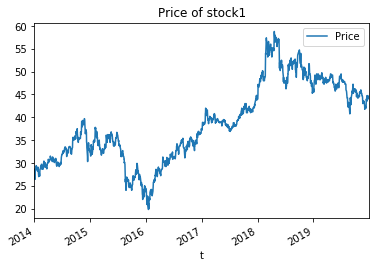

In [6]:
# Remove NA
# stock = stock.loc[stock['VA']!='NA']

# Check NA
stock1.loc[stock1['Price']=='NA']

stock1[['Price']].plot(title="Price of stock1")

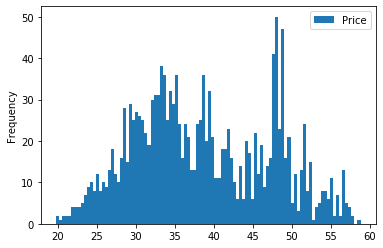

In [7]:
stock1[['Price']].plot.hist(bins=100)

# Calculating Volatility

For simplicity, let's assume we have monthly stock closing prices of $1 through $10. For example, month one is $1, month two is $2, and so on. To calculate variance, follow the five steps below.

1. Find the mean of the data set. This means adding each value, and then dividing it by the number of values. This is a mean, or average price, of 5.50.
2. Calculate the difference between each data value and the mean. This is often called deviation. For example, we take 10 - 5.50 = 4.50, then 9 - 5.50 = 3.50. This continues all the way down to the our first data value of 1. Negative numbers are allowed. Since we need each value, these calculation are frequently done in a spreadsheet.  
3. Square the deviations. This will eliminate negative values.  
4. Add the squared deviations together. In our example, this equals 82.5.  
5. Divide the sum of the squared deviations (82.5) by the number of data values.  

In [8]:
df = stock1
# df['5d_rolling_mean'] = stock1.rolling(5).mean()
# df['5d_mean_expanding'] = stock1.expanding(5).mean()

# Calculate daily return


Use window function

https://pandas.pydata.org/pandas-docs/stable/reference/window.html


See this example how to use apply with lambda function.

https://stackoverflow.com/questions/40954560/pandas-rolling-apply-custom



rolling.Rolling.std gives different value than our custom volatility calculation functions.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.std.html

Using ddof=0 (default degree of freedom is n-1) will get the same values for us and them.


In [9]:
df['Price']

t
2014-01-01    28.60
2014-01-02    27.40
2014-01-03    26.80
2014-01-06    26.40
2014-01-07    28.10
              ...  
2019-12-25    44.25
2019-12-26    44.50
2019-12-27    44.25
2019-12-30    44.00
2019-12-31    44.00
Name: Price, Length: 1566, dtype: float64

In [10]:
df['Daily Return'] = np.log(df['Price'] / df['Price'].shift(1))

In [11]:
df['mean_5d'] = df['Daily Return'].rolling(window=5).mean()
df

,Price,Date,Daily Return,mean_5d
t,,,,
2014-01-01,28.60,2014-01-01,NaN,NaN
2014-01-02,27.40,2014-01-02,-0.042864,NaN
2014-01-03,26.80,2014-01-03,-0.022141,NaN
2014-01-06,26.40,2014-01-06,-0.015038,NaN
2014-01-07,28.10,2014-01-07,0.062406,NaN
...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,-0.002247
2019-12-26,44.50,2019-12-26,0.005634,0.001127
2019-12-27,44.25,2019-12-27,-0.005634,-0.001127


In [12]:
df['deviation_5d'] = df['Daily Return'] - df['mean_5d']
df

,Price,Date,Daily Return,mean_5d,deviation_5d
t,,,,,
2014-01-01,28.60,2014-01-01,NaN,NaN,NaN
2014-01-02,27.40,2014-01-02,-0.042864,NaN,NaN
2014-01-03,26.80,2014-01-03,-0.022141,NaN,NaN
2014-01-06,26.40,2014-01-06,-0.015038,NaN,NaN
2014-01-07,28.10,2014-01-07,0.062406,NaN,NaN
...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,-0.002247,0.002247
2019-12-26,44.50,2019-12-26,0.005634,0.001127,0.004507
2019-12-27,44.25,2019-12-27,-0.005634,-0.001127,-0.004507


In [13]:
# Variance is deviation squared
df['variance_5d'] = np.square(df['deviation_5d']).rolling(window=5).sum()

In [14]:
# df = df.dropna()

In [15]:

df

,Price,Date,Daily Return,mean_5d,deviation_5d,variance_5d
t,,,,,,
2014-01-01,28.60,2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,27.40,2014-01-02,-0.042864,NaN,NaN,NaN
2014-01-03,26.80,2014-01-03,-0.022141,NaN,NaN,NaN
2014-01-06,26.40,2014-01-06,-0.015038,NaN,NaN,NaN
2014-01-07,28.10,2014-01-07,0.062406,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,-0.002247,0.002247,0.000528
2019-12-26,44.50,2019-12-26,0.005634,0.001127,0.004507,0.000219
2019-12-27,44.25,2019-12-27,-0.005634,-0.001127,-0.004507,0.000228


In [16]:
# Checking which variable we can access.
# stddev_5d = lambda x: x.mean() + x[0]
# x[5] -> IndexError: index 5 is out of bounds

# Calcualtes price volatility (std.dev.) for 5 day window. 1. Find mean. 2. Find deviation. 3. Squared deviation. 4. Sum squared devations. 5. Divide by number of ovservations. This is variance. 6. Take square root.
stddev_5d = lambda x: np.sqrt((np.square(x[0]-x.mean()) + np.square(x[1]-x.mean()) + np.square(x[2]-x.mean()) + np.square(x[3]-x.mean()) + np.square(x[4]-x.mean())) / 5)

def stddev_ndays(x, n=5):
    """Calcualte standard deviation which is the proxy for volatility.
       Improve for clarity over stddev_5d one-liner. """
    mean = x.mean() # Mean of the window.
    total_squared_deviation = 0.0 # For collecting squared deviation.
    for i in range(n):
        obs = x[i]
        deviation = obs - mean
        sqrd_dev = np.square(deviation)
        total_squared_deviation += sqrd_dev
    return np.sqrt(total_squared_deviation / n) # Take square root of variance and return st.dev. value

df['rolling5d_stddev'] = df['Price'].rolling(5).std() # Short cut available from pandas
df['stddev_ndays5'] = df['Price'].rolling(5).apply(stddev_ndays, (5,)) # Manual window function
df['stddev_5d'] = df['Price'].rolling(5).apply(stddev_5d)

df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


,Price,Date,Daily Return,mean_5d,deviation_5d,variance_5d,rolling5d_stddev,stddev_ndays5,stddev_5d
t,,,,,,,,,
2014-01-01,28.60,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,27.40,2014-01-02,-0.042864,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,26.80,2014-01-03,-0.022141,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,26.40,2014-01-06,-0.015038,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,28.10,2014-01-07,0.062406,NaN,NaN,NaN,0.904434,0.808950,0.808950
...,...,...,...,...,...,...,...,...,...
2019-12-25,44.25,2019-12-25,0.000000,-0.002247,0.002247,0.000528,0.223607,0.200000,0.200000
2019-12-26,44.50,2019-12-26,0.005634,0.001127,0.004507,0.000219,0.209165,0.187083,0.187083
2019-12-27,44.25,2019-12-27,-0.005634,-0.001127,-0.004507,0.000228,0.223607,0.200000,0.200000


# check: Dec 2019, SCB volatility

In [17]:

stock2 = get_price_series('SCB', series)
stock2

,Price,Date
t,,
2014-01-01,143.5,2014-01-01
2014-01-02,131.5,2014-01-02
2014-01-03,132.5,2014-01-03
2014-01-06,140.0,2014-01-06
2014-01-07,144.0,2014-01-07
...,...,...
2019-12-25,119.5,2019-12-25
2019-12-26,119.0,2019-12-26
2019-12-27,119.5,2019-12-27


In [18]:
stock2['Daily Return'] = np.log(stock2['Price'] / stock2['Price'].shift(1))

# Specific stock, specific time-period.
df2 = stock2['2019-12-01':'2019-12-31']
df2

,Price,Date,Daily Return
t,,,
2019-12-02,120.0,2019-12-02,-0.008299
2019-12-03,120.0,2019-12-03,0.000000
2019-12-04,118.0,2019-12-04,-0.016807
2019-12-05,118.0,2019-12-05,0.000000
2019-12-06,117.5,2019-12-06,-0.004246
2019-12-09,118.0,2019-12-09,0.004246
2019-12-10,118.0,2019-12-10,0.000000
2019-12-11,117.5,2019-12-11,-0.004246
2019-12-12,118.5,2019-12-12,0.008475


In [19]:
# Calculate volatility

df2['rolling5d_stddev'] = df2['Daily Return'].rolling(5).std(ddof=0)

df2['stddev_5d'] = df2['Daily Return'].rolling(5).apply(stddev_5d)

df2['stddev_ndays5'] = df2['Daily Return'].rolling(5).apply(stddev_ndays, (5,))

df2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Price,Date,Daily Return,rolling5d_stddev,stddev_5d,stddev_ndays5
t,,,,,,
2019-12-02,120.0,2019-12-02,-0.008299,NaN,NaN,NaN
2019-12-03,120.0,2019-12-03,0.000000,NaN,NaN,NaN
2019-12-04,118.0,2019-12-04,-0.016807,NaN,NaN,NaN
2019-12-05,118.0,2019-12-05,0.000000,NaN,NaN,NaN
2019-12-06,117.5,2019-12-06,-0.004246,0.006278,0.006278,0.006278
2019-12-09,118.0,2019-12-09,0.004246,0.007239,0.007239,0.007239
2019-12-10,118.0,2019-12-10,0.000000,0.007239,0.007239,0.007239
2019-12-11,117.5,2019-12-11,-0.004246,0.003178,0.003178,0.003178
2019-12-12,118.5,2019-12-12,0.008475,0.004946,0.004946,0.004946


# Cross-section analysis of SET: Nov, Dev 2019

In [20]:
volatility = {}

for k in series.keys():
    # print(k)
    try:
        stock = get_price_series(k, series)
        # Calculate volatility
        stock['rolling5d_stddev'] = stock['Price'].rolling(5).std(ddof=0)
        stock['stddev_5d'] = stock['Price'].rolling(5).apply(stddev_5d)
        stock['stddev_ndays5'] = stock['Price'].rolling(5).apply(stddev_ndays, (5,))
        volatility[k] = stock['2019-11-20':'2019-12-31']
    except Exception as e:
        print("Error calculating volatility for %s: %s" % (k, e))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


7UP
A
AAV
ABPIF
ACC
ACE
No numeric types to aggregate
ACG
No numeric types to aggregate
ADVANC
AEC
AEONTS
AFC
AH
AHC
AI
AIMCG
No numeric types to aggregate
AIMIRT
No numeric types to aggregate
AIT
AJ
AJA
No numeric types to aggregate
AKR
ALLA
No numeric types to aggregate
ALT
No numeric types to aggregate
ALUCON
AMANAH
AMARIN
AMATA
AMATAR
AMATAV
No numeric types to aggregate
AMC
ANAN
AOT
AP
APCO
APCS
APEX
APURE
AQ
AQUA
AS
ASAP
No numeric types to aggregate
ASEFA
No numeric types to aggregate
ASIA
ASIAN
ASIMAR
ASK
ASP
AWC
No numeric types to aggregate
AYUD
BWORK
No numeric types to aggregate
B
B52
BA
No numeric types to aggregate
BAFS
BAM
No numeric types to aggregate
BANPU
BAT3K
BAY
BBL
BCH
BCP
BCPG
No numeric types to aggregate
BCT
BDMS
BEAUTY
BEC
BEM
No numeric types to aggregate
BFIT
BGC
No numeric types to aggregate
BGRIM
No numeric types to aggregate
BH
BIG
BJC
BJCHI
BKD
BKER
No numeric types to aggregate
BKI
BKKCP
BLA
BLAND
BOFFICE
No numeric types to aggregate
BPP
No numeric typ

In [21]:
len(volatility) # Volatility data Dec 2019

469

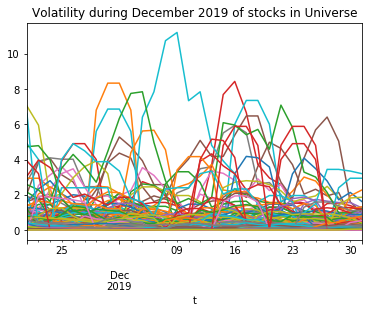

In [22]:
for k, s in volatility.items():
    s['stddev_5d'].plot(title="Volatility during December 2019 of stocks in Universe")

In [23]:
crossection = []

for k, s in volatility.items():
    s['mean_vol'] = s['stddev_5d'].mean()
    item = {'ticker': k, 'mean_volatility': s['stddev_5d'].mean(), 
            'volatility_5d': s['2019-12-20':'2019-12-21']['stddev_5d'].values[0]}
    crossection.append(item)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
crossection = pd.DataFrame(crossection)
crossection[['ticker','volatility_5d']]

,ticker,volatility_5d
0,7UP,0.006325
1,A,0.024495
2,AAV,0.029933
3,ABPIF,0.009798
4,ACC,0.026533
...,...,...
464,WHA,0.041183
465,WIIK,0.023152
466,WIN,0.000000
467,WORK,0.120000


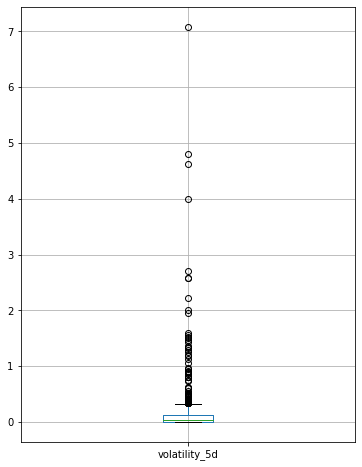

In [25]:

crossection[['ticker','volatility_5d']].boxplot('volatility_5d', figsize=(6,8), rot=0)

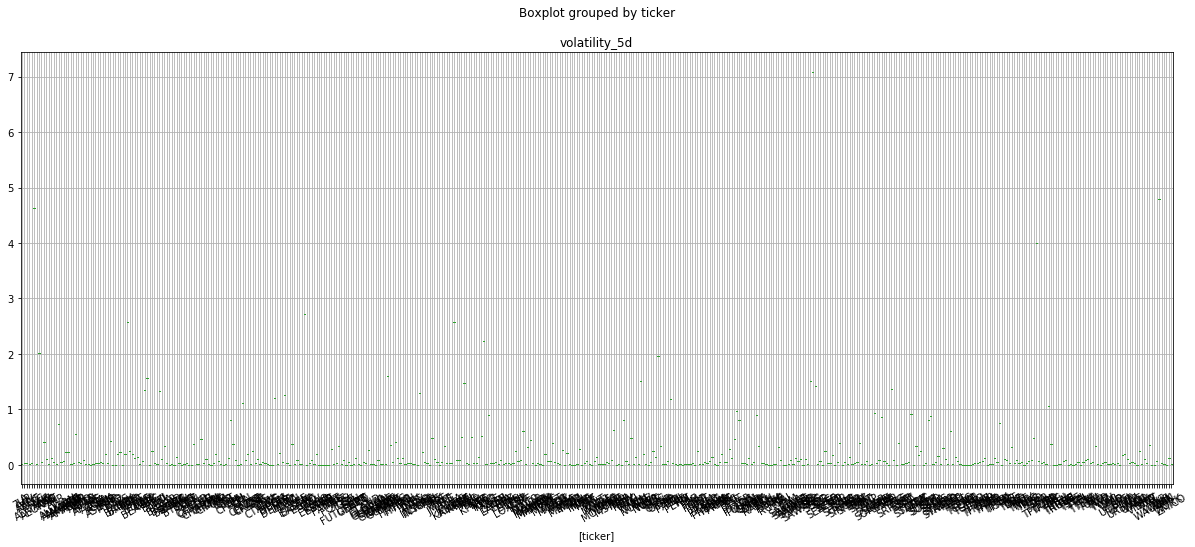

In [26]:

crossection[['ticker','volatility_5d']].boxplot('volatility_5d', by=['ticker'], figsize=(20,8), rot=30)

In [42]:
stat = crossection[['volatility_5d']].describe().T
stat

,count,mean,std,min,25%,50%,75%,max
volatility_5d,469.0,0.217166,0.600283,0.0,0.010198,0.038158,0.135647,7.082372


In [43]:
q1_ub = stat[0:1]['25%'].values[0]

In [44]:
# First quartile 25%, volatility_5d < 0.010198

# lookup.loc[lookup['name']=='ZEN CORPORATION'].symbol.values[0]

rank_q1 = crossection.loc[crossection['volatility_5d'] <= q1_ub]
rank_q1

,ticker,mean_volatility,volatility_5d
0,7UP,0.012019,0.006325
3,ABPIF,0.015231,0.009798
6,AEC,0.007029,0.007483
11,AI,0.018778,0.009798
14,AKR,0.006869,0.007483
...,...,...,...
456,VIBHA,0.017889,0.006325
460,W,0.003044,0.000000
461,WACOAL,0.121847,0.000000
466,WIN,0.006498,0.000000


In [45]:
rank_q1[['volatility_5d']].describe().T

,count,mean,std,min,25%,50%,75%,max
volatility_5d,118.0,0.004337,0.003666,0.0,0.0,0.004899,0.007483,0.010198


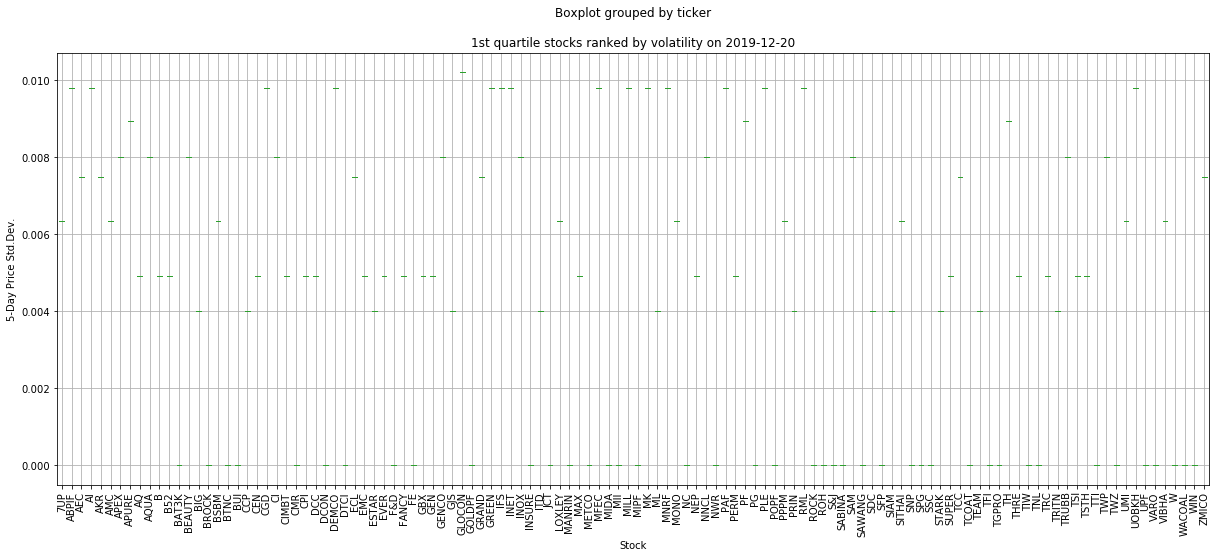

In [46]:
ax = rank_q1[['ticker','volatility_5d']].boxplot('volatility_5d', by=['ticker'], figsize=(20,8), rot=90)
# ax.set_ylim(-0.1,7.2) # Set same canvas height so plot show different levels of std.dev.
plt.ylabel('5-Day Price Std.Dev.')
plt.xlabel('Stock')
plt.title(label="1st quartile stocks ranked by volatility on 2019-12-20")
plt.savefig("vol_5d_q1.png")

In [47]:
# Select quarter 2: 25%-50%
ub = stat[0:1]['50%'].values[0]
lb = stat[0:1]['25%'].values[0]
rank_q2 = crossection.loc[crossection['volatility_5d'] <= ub]
rank_q2 = rank_q2.loc[rank_q2['volatility_5d'] > lb]
rank_q2

,ticker,mean_volatility,volatility_5d
1,A,0.022830,0.024495
2,AAV,0.038019,0.029933
4,ACC,0.021021,0.026533
21,ANAN,0.046308,0.029933
24,APCO,0.020538,0.029933
...,...,...,...
440,TYCN,0.029844,0.032000
442,UAC,0.017275,0.014967
444,UNIQ,0.087209,0.031623
451,UTP,0.087091,0.024495


In [48]:
rank_q2[['volatility_5d']].describe().T

,count,mean,std,min,25%,50%,75%,max
volatility_5d,117.0,0.023488,0.007473,0.010198,0.01833,0.023324,0.029933,0.038158


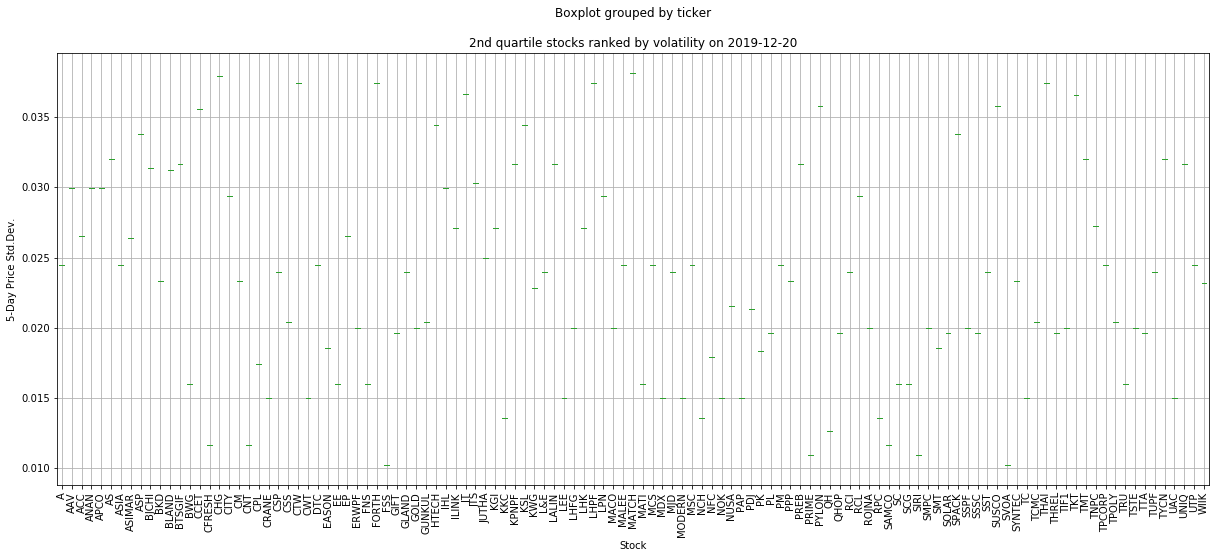

In [49]:
ax = rank_q2[['ticker','volatility_5d']].boxplot('volatility_5d', by=['ticker'], figsize=(20,8), rot=90)
# ax.set_ylim(-0.1,7.2) # Set same canvas height so plot show different levels of std.dev.
plt.ylabel('5-Day Price Std.Dev.')
plt.xlabel('Stock')
plt.title(label="2nd quartile stocks ranked by volatility on 2019-12-20")
plt.savefig("vol_5d_q2.png")

In [50]:
# Select quarter 3: 50%-75%
rank_q3 = crossection.loc[crossection['volatility_5d'] <= stat[0:1]['75%'].values[0]]
rank_q3 = rank_q3.loc[rank_q3['volatility_5d'] > stat[0:1]['50%'].values[0]]
rank_q3

,ticker,mean_volatility,volatility_5d
8,AFC,0.076856,0.048990
10,AHC,0.103223,0.109545
12,AIT,0.139926,0.120000
13,AJ,0.097291,0.044721
16,AMANAH,0.065350,0.051536
...,...,...,...
457,VIH,0.066357,0.097980
458,VNG,0.042968,0.038781
462,WAVE,0.029571,0.064374
464,WHA,0.057471,0.041183


In [51]:
rank_q3[['volatility_5d']].describe().T

,count,mean,std,min,25%,50%,75%,max
volatility_5d,117.0,0.072405,0.026777,0.038262,0.04899,0.067823,0.088,0.135647


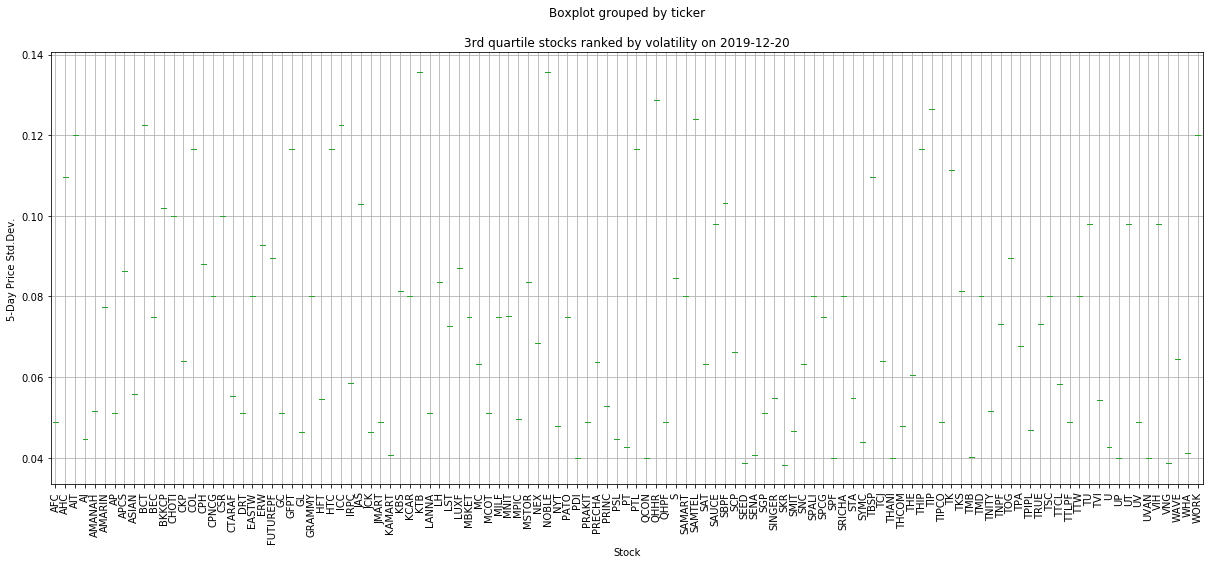

In [52]:
ax = rank_q3[['ticker','volatility_5d']].boxplot('volatility_5d', by=['ticker'], figsize=(20,8), rot=90)
# ax.set_ylim(-0.1,7.2) # Set same canvas height so plot show different levels of std.dev.
plt.ylabel('5-Day Price Std.Dev.')
plt.xlabel('Stock')
plt.title(label="3rd quartile stocks ranked by volatility on 2019-12-20")
plt.savefig("vol_5d_q3.png")

In [53]:
# Select quarter 4: > 75%
rank_q4 = crossection.loc[crossection['volatility_5d'] > stat[0:1]['75%'].values[0]]
rank_q4

,ticker,mean_volatility,volatility_5d
5,ADVANC,2.648619,4.630335
7,AEONTS,2.384365,2.014944
9,AH,0.224184,0.416653
15,ALUCON,0.978242,0.734847
18,AMATA,0.363059,0.228035
...,...,...,...
448,UPOIC,0.051666,0.171301
449,URBNPF,0.057369,0.186161
455,VGI,0.150270,0.254165
459,VNT,0.238471,0.348425


In [54]:
rank_q4[['volatility_5d']].describe().T

,count,mean,std,min,25%,50%,75%,max
volatility_5d,117.0,0.770252,1.019514,0.135647,0.244949,0.374166,0.894427,7.082372


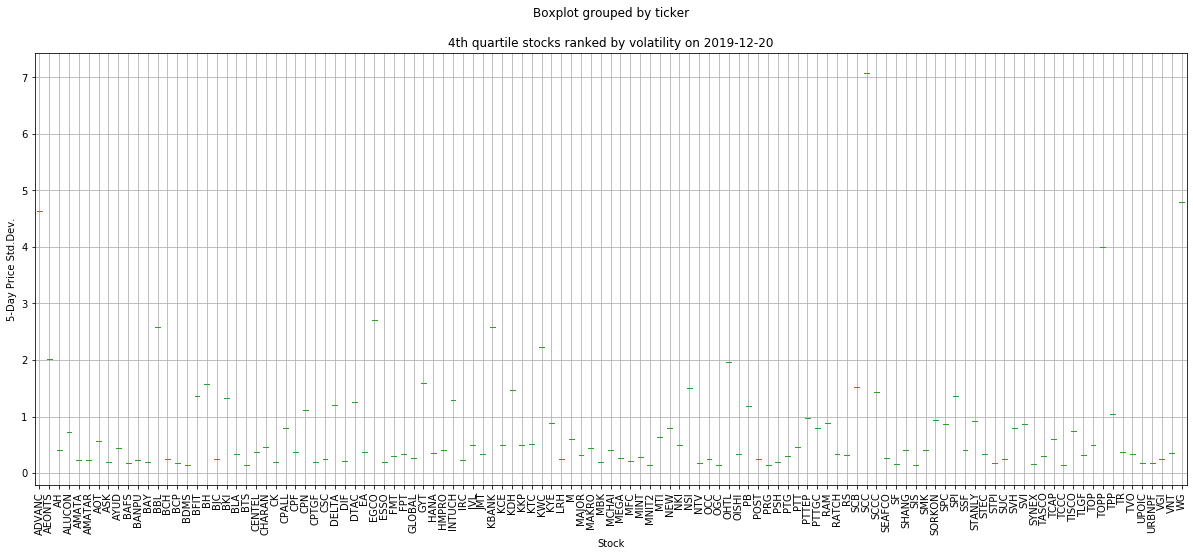

In [55]:
ax = rank_q4[['ticker','volatility_5d']].boxplot('volatility_5d', by=['ticker'], figsize=(20,8), rot=90)
# ax.set_ylim(-0.1,7.2) # Set same canvas height so plot show different levels of std.dev.
plt.ylabel('5-Day Price Std.Dev.')
plt.xlabel('Stock')
plt.title(label="4th quartile stocks ranked by volatility on 2019-12-20")
plt.savefig("vol_5d_q4.png")

count	min-max
Q1 118	0.0	- 0.010198
Q2 117  0.010198 - 0.038158
Q3 117  0.038262 - 0.135647
Q4 117  0.135647 - 7.082372




In [41]:
118+117+117+117

469